<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl/blob/main/MN_Gen_Alg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#algoritmo genetico
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def amenazas(c):#c es una permutacion de (1,2,...,N)
    N=len(c)
    #La reina i esta en (i,c[i]).
    num_amenazas=[]
    amenazas=[]
    for i in range(N):
        amenazas_i=[]
        num_amenazas_i=0
        for j in range(N):
            if(i!=j and abs(c[i]-c[j])==abs(i-j)):
                num_amenazas_i+=1
                amenazas_i.append(j+1)
        num_amenazas.append(num_amenazas_i)
        amenazas.append(amenazas_i)
    return amenazas
    

[1 4 2 8 7 6 3 5]


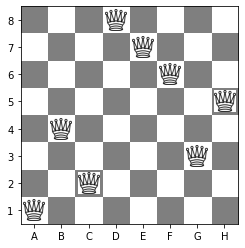

In [6]:
import matplotlib.pyplot as plt
import numpy as np
nrows, ncols = 8,8
board = np.zeros((8,8,3))
board += 0.5 # "Black" color
board[::2, ::2] = 1 # "White" color
board[1::2, 1::2] = 1 # "White" color
positions =np.array([1, 4, 2, 8, 7, 6, 3, 5])-1
#np.random.permutation(range(0,8))
print(np.array(positions)+1)
#fila, columna.
fig, ax = plt.subplots()
ax.imshow(board, interpolation='nearest')

queen = plt.imread('queen.png')
extent = np.array([-0.4, 0.4, -0.4, 0.4]) # (0.5 would be the full cell)
for y, x in enumerate(positions):
    ax.imshow(queen, extent=extent + [y, y, x, x])
col_labels=['A','B','C','D','E','F','G','H']
row_labels=range(1,nrows+1)
plt.xticks(range(ncols), col_labels)
plt.yticks(range(nrows), row_labels)
ax.axis('image')

plt.show()

In [155]:
def print_reinas(N,config,amenazas):
    nrows, ncols = N,N
    board = np.zeros((N,N,3))
    board += 0.5 # "Black" color
    board[::2, ::2] = 1 # "White" color
    board[1::2, 1::2] = 1 # "White" color
    positions =np.array(config)-1
    #np.random.permutation(range(0,8))
    print(np.array(positions)+1)
    positions=positions.tolist()
    #fila, columna.
    fig, ax = plt.subplots()
    ax.imshow(board, interpolation='nearest')

    queen = plt.imread('queen.png')
    queen_roja = plt.imread('queen_roja.png')
    extent = np.array([-0.4, 0.4, -0.4, 0.4])
    for x, y in enumerate(positions):
        if(len(amenazas[x])>0):
            ax.imshow(queen_roja, extent=extent + [x, x, y, y])
        else:
            ax.imshow(queen, extent=extent + [x, x, y, y])
    col_labels=['A','B','C','D','E','F','G','H']
    row_labels=range(1,nrows+1)
    plt.xticks(range(ncols), col_labels)
    plt.yticks(range(nrows), row_labels)
    ax.axis('image')

    plt.show()

[1 4 2 8 7 6 3 5]


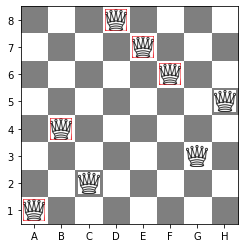

In [156]:
print_reinas(8,[1, 4, 2, 8, 7, 6, 3, 5],amenazas([1, 4, 2, 8, 7, 6, 3, 5]))

In [159]:
val_aptitud(amenazas([1, 4, 2, 8, 7, 6, 3, 5]))

5.0

In [7]:
print(aptitud([1, 4, 2, 8, 7, 6, 3, 5]))
def val_aptitud(c):
    valor=0
    for i in range(len(c)):
        valor+=len(c[i])
    return valor/2

[[6], [5], [], [5, 6], [2, 4, 6], [1, 4, 5], [], []]


In [19]:
val_aptitud(amenazas([1, 4, 2, 8, 7, 6, 3, 5]))

5.0

In [25]:
def order_1_crossover(p1,p2):
    temp_p2=np.copy(p2)
    temp_p2=temp_p2.tolist()
    a1,a2=np.random.permutation(range(1,len(p1)+1))[0:2]
    p1_1=p1.index(a1)
    p1_2=p1.index(a2)
    indices=sorted([p1_1,p1_2])
    hijo=[-1]*len(p1)
    for i in range(indices[0],indices[1]+1):
        hijo[i]=p1[i]
        temp_p2.remove(p1[i])
    for j in range(len(p1)):
        if(hijo[j]<0):
            hijo[j]=temp_p2[0]
            temp_p2.remove(hijo[j])
    return(hijo)

In [33]:
def mutation(hijo,mu=0.05):
    mu_r=np.random.uniform(0,1)
    if(mu_r<mu):
        print("hay mutacion")
        a1=np.random.choice(range(1,len(hijo)))
        a2=np.random.choice(range(1,len(hijo)))
        while(a2==a1):
            a2=np.random.choice(range(1,len(hijo)))
        h1=hijo[a1]
        h2=hijo[a2]
        hijo[a1]=h2
        hijo[a2]=h1
    return (hijo)

In [17]:
M=int(np.floor(np.sqrt(8)))
def select_padres(poblacion):
    aptitudes=[]
    suma=0
    breakpoints=[]
    for config in poblacion:
        aptitudes.append(val_aptitud(amenazas(config)))
    posibles_padres=[]
    temp_aptitudes=np.copy(aptitudes)
    temp_aptitudes=temp_aptitudes.tolist()
    for i in range(M):
        max=np.min(temp_aptitudes)
        posibles_padres.append(temp_aptitudes.index(max))
        temp_aptitudes[posibles_padres[-1]]=100
    p1=np.random.choice(posibles_padres)
    p2=np.random.choice(posibles_padres)
    while(p2==p1):
        p2=np.random.choice(posibles_padres)
    return ([aptitudes,int(p1),int(p2)])


In [39]:
def prueba(**A):
    if(A):
        if(type(A['A'])==type([])):
            print("lista")
        if(type(A['A'])==type(0)):
            print("numero")


In [52]:
def generar_poblacion(N,k):
    poblacion=[]
    for i in range(k):
        poblacion.append(np.random.permutation(range(1,N+1)).tolist())
    return poblacion

In [124]:
def reinas(N,max_iter=20,**pob_inicial):
    count=0
    if(pob_inicial):
        if(type(pob_inicial['pob_inicial'])==type([])):
            poblacion=pob_inicial['pob_inicial']
        if(type(pob_inicial['pob_inicial'])==type(0)):
            tam_pob=pob_inicial['pob_inicial']
            poblacion=generar_poblacion(N,k=tam_pob)
    else:
        tam_pob=10
        poblacion=generar_poblacion(N,k=tam_pob)
    best=1
    while(count<max_iter and best>0):
        aptitudes,i1,i2=select_padres(poblacion)
        hijo=mutation(order_1_crossover(poblacion[i1],poblacion[i2]),0.6)
        best=np.max(aptitudes)
        if(count%50==0):
            print("mejor adaptado:",best)
            print_reinas(N,config=poblacion[aptitudes.index(best)])
        redefinir(poblacion[aptitudes.index(best)],hijo)
        count+=1
    if(count==max_iter or best==0):
        print("iteracion alcanzada",count)
        print("mejor adaptado:",best)
        print_reinas(N,config=poblacion[aptitudes.index(best)])
    return(poblacion[aptitudes.index(np.max(aptitudes))])

mejor adaptado: 18.0
[ 8  2 10  4  1 13  7 15 12  6  5 16  3 14  9 11]


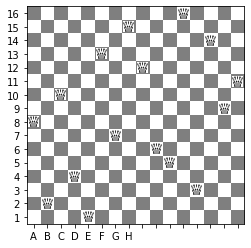

hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
mejor adaptado: 5.0
[ 4  1 13 15 10  6 14 12  9  3 16  5  8 11  7  2]


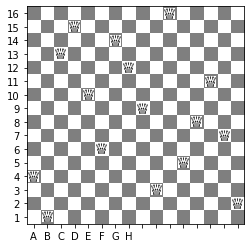

hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
mejor adaptado: 6.0
[ 4  3 13 15 10  6 14 12  5  1 16  9  8 11  7  2]


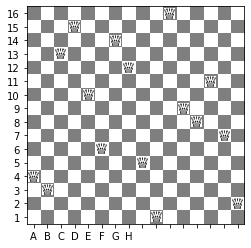

hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
mejor adaptado: 4.0
[ 4  8 13 15 10  6 14 12  5  3 16  9  1 11  7  2]


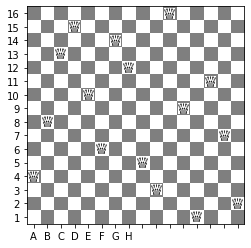

hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
mejor adaptado: 3.0
[ 4  6 13 15 10  8 14  9  5  3  1 16 12 11  7  2]


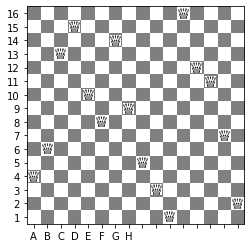

hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
mejor adaptado: 3.0
[ 4 10  1 15  8  6 14  9  5  3 13 16 12  2  7 11]


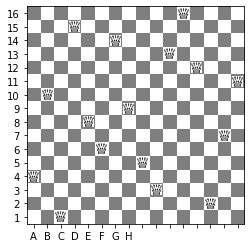

hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
iteracion alcanzada 264
mejor adaptado: 0.0
[ 4  8  1 15 10  6 14  9  5  3 13 16 12  2  7 11]


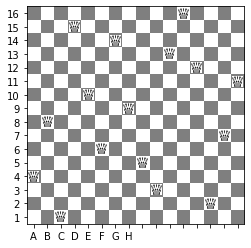

[4, 8, 1, 15, 10, 6, 14, 9, 5, 3, 13, 16, 12, 2, 7, 11]

In [129]:
reinas(N=16,max_iter=600)